In [1]:
#importing the required libraries

import glob
import os
import shutil
import json
import zipfile
import csv

In [2]:
# creating a temp file
TMPDIR = 'tmp'

In [3]:
if not os.path.exists(TMPDIR):
    os.makedirs(TMPDIR)

In [4]:
# code that reads all the zip files in the folder and saves them to tweetzipfiles

tweetzipfiles = glob.glob('*.zip')

In [5]:
tweetzipfiles

['citi_bike.zip', 'Uber_JUMP.zip']

In [6]:
# Unzipping the zip files and extracting all three

for tweetzipfile in tweetzipfiles:
    with zipfile.ZipFile(tweetzipfile, "r") as f:
        print('Unzipping to tmp directory: %s' % tweetzipfile)
        f.extractall(TMPDIR)

Unzipping to tmp directory: citi_bike.zip
Unzipping to tmp directory: Uber_JUMP.zip


In [7]:
# segmenting the tweets by the number of tweets a user has posted. 

uniqueusers = {}
count = 0
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn)
    #print(fn)
    with open(fn) as f:
        count += 1
        if count % 1000 == 0:
            print(count)
        tweetjson = json.load(f)
        userwhotweeted = tweetjson['user']['screen_name']
        
        if userwhotweeted in uniqueusers:
            uniqueusers[userwhotweeted] += 1
        if userwhotweeted not in uniqueusers:
            uniqueusers[userwhotweeted] = 1

1000
2000
3000


In [8]:
# out of 25k only 22639 are unique users
len(uniqueusers)

2714

In [9]:
# I want only people who tweeted more than once 
userstoinclude = set()
usercount = 0
for auser in uniqueusers:
    if uniqueusers[auser] > 1:
        # play with this number... 1000 is fine
        usercount += 1
        userstoinclude.add(auser)
        
print(len(userstoinclude))

323


In [12]:
# Who these people are talking too, to know their connections we are making an edgelist

edgelist = open('scooters.edgelist.for.gephi.csv', 'w')
csvwriter = csv.writer(edgelist)
header = ['Source', 'Target']
csvwriter.writerow(header)

15

In [13]:
print('Writing edge list')
count = 0
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn)
    with open(fn) as f:
        tweetjson = json.load(f)
        uniqueusers = tweetjson['user']['screen_name']
        if uniqueusers in uniqueusers:
            count += 1
            if count % 1000 == 0:
                print(count)
            
            users = tweetjson['entities']['user_mentions']
            if len(users) > 0:
                for auser in users:
                    screenname = auser['screen_name']
                    row = [uniqueusers, screenname]
                    csvwriter.writerow(row)
                    
edgelist.close()

Writing edge list
1000
2000
3000


The two main clusters of Jump Ride Uber and it's major competitor Citibike Lyft are shown in the graph. The dark pink edges (links) represent the usernames of the people who tweeted about either of these products. As can be seen, some of the lines in both clusters are connected with each other showing that those people are in some way connected with each other. 

In a marketing context, this information can be used to feature advertisement targeting the people in both clusters for the effective acquisition and retention of users.

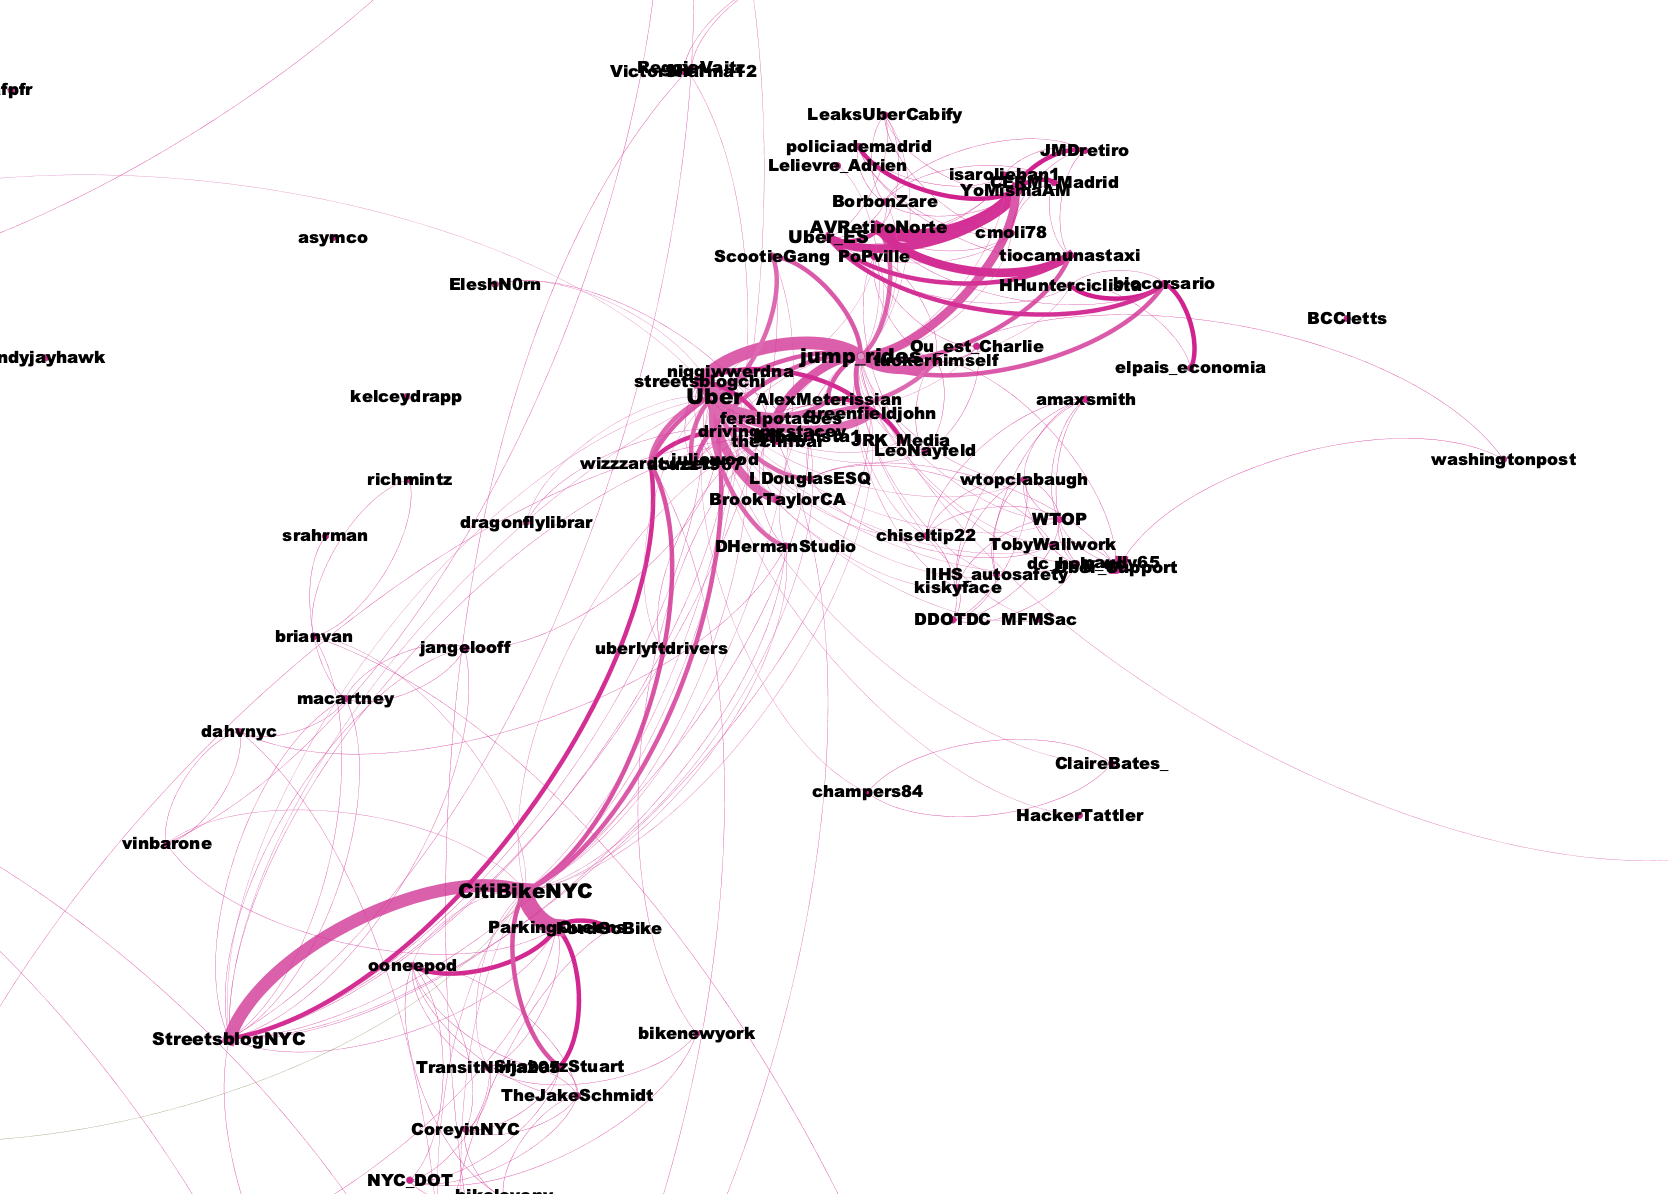


In [14]:
# Who these people are talking too, to know their connections we are making an edgelist

edgelist = open('scooters_tweetedmorethanonce.edgelist.for.gephi.csv', 'w')
csvwriter = csv.writer(edgelist)
header = ['Source', 'Target']
csvwriter.writerow(header)

15

In [15]:
print('Writing edge list')
count = 0
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn)
    with open(fn) as f:
        tweetjson = json.load(f)
        userstoinclude = tweetjson['user']['screen_name']
        if userstoinclude in userstoinclude:
            count += 1
            if count % 1000 == 0:
                print(count)
            
            users = tweetjson['entities']['user_mentions']
            if len(users) > 0:
                for auser in users:
                    screenname = auser['screen_name']
                    row = [userstoinclude, screenname]
                    csvwriter.writerow(row)
                    
edgelist.close()

Writing edge list
1000
2000
3000


# Users who tweeted more than once graph 

This graph only demonstrates the people who have tweeted more than once. 
They can be considered as frequent users of our product.


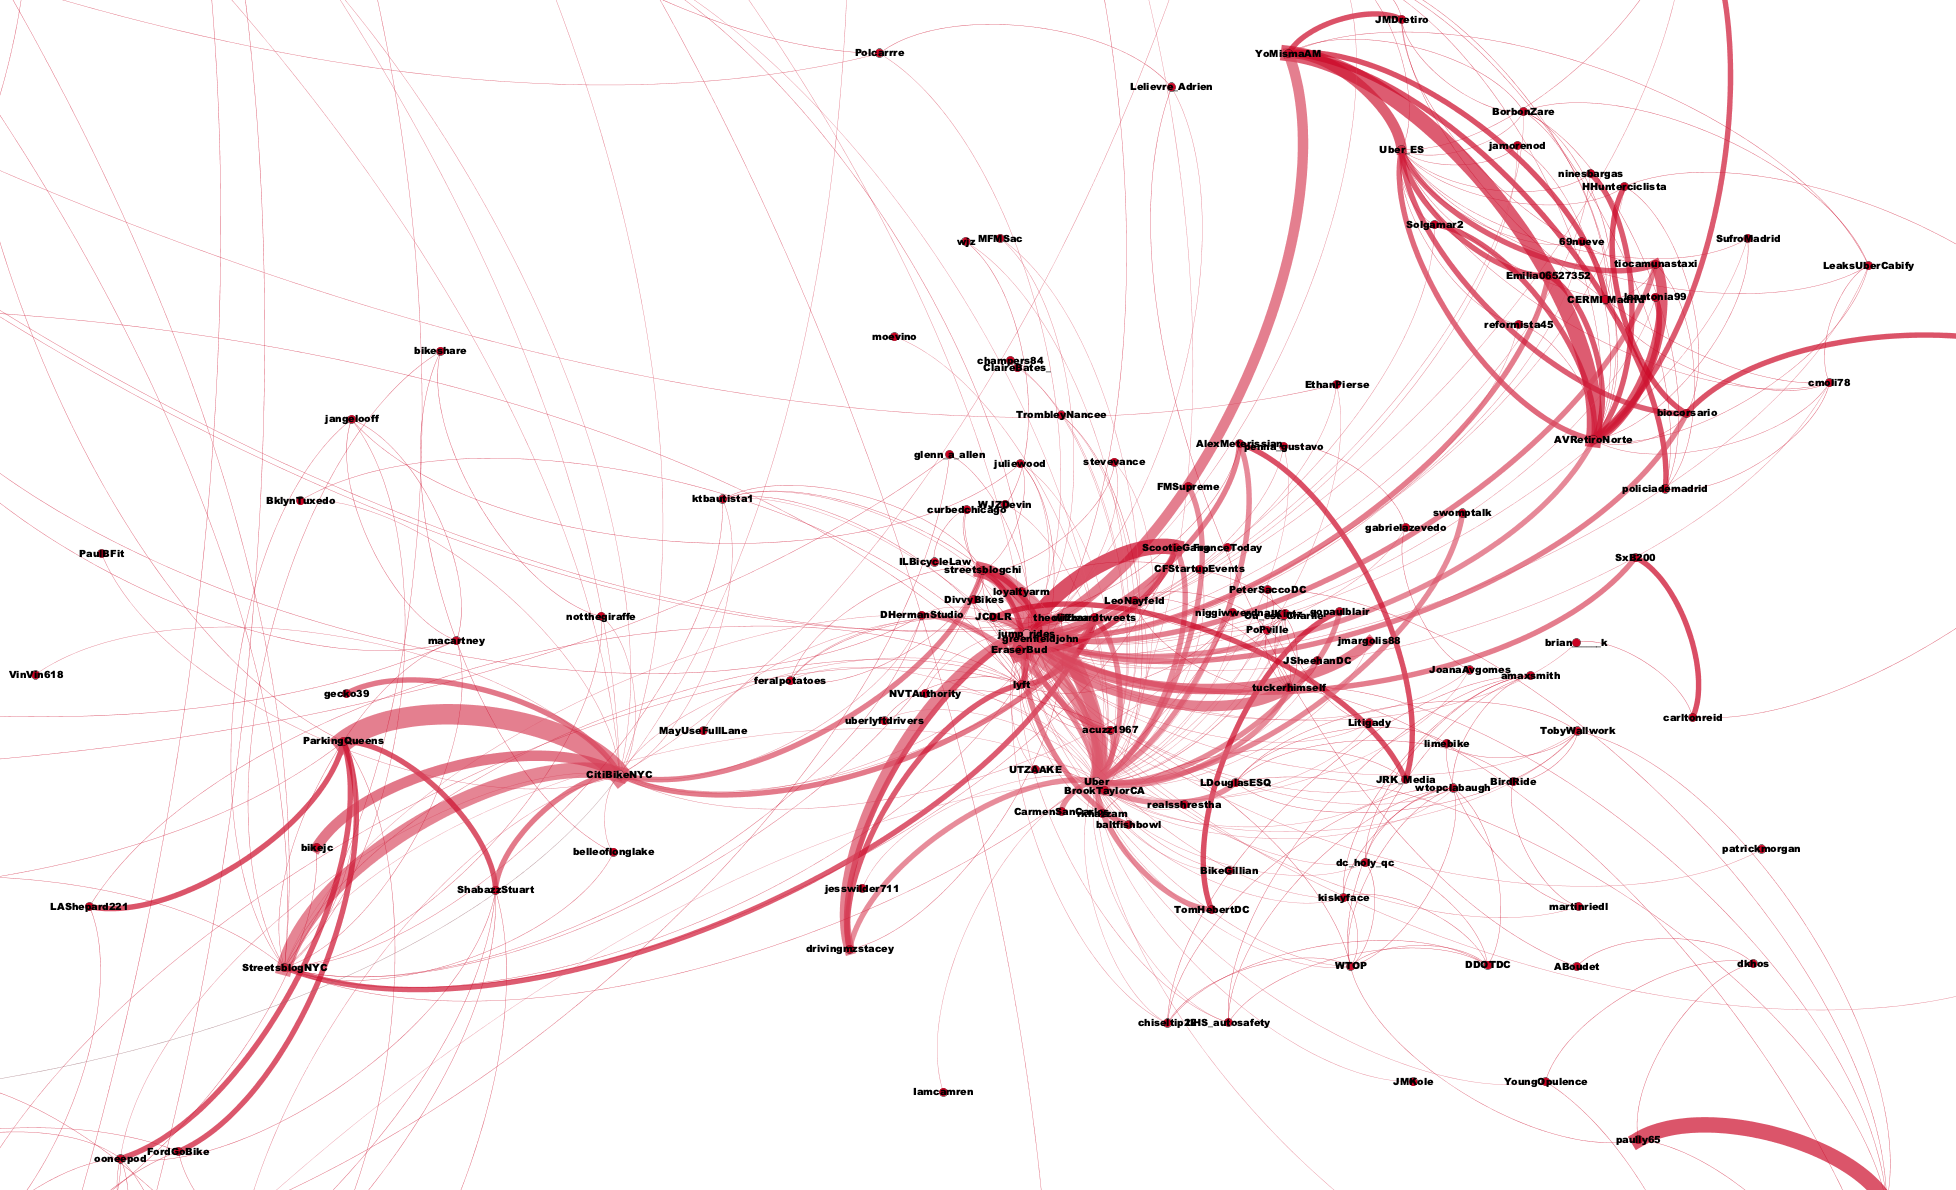

# Semantic Analysis

In [16]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
import glob
import os
import re
import shutil
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import csv
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import string
import itertools
import zipfile
import json
punctuation = string.punctuation
stopwordsset = set(stopwords.words("english"))
stopwordsset.add("'s")
#Removing urls
def removeURL(text):
    result = re.sub(r"http\S+", "", text)
    return result
#Extracting contextual words from a sentence
def tokenize(text):
    #lower case
    text = text.lower()
    #split into individual words
    words = word_tokenize(text)
    return words
def stem(tokenizedtext):
    rootwords = []
    for aword in tokenizedtext:
        aword = ps.stem(aword)
        rootwords.append(aword)
    return rootwords
def stopWords(tokenizedtext):
    goodwords = []
    for aword in tokenizedtext:
        if aword not in stopwordsset:
            goodwords.append(aword)
    return goodwords
def lemmatizer(tokenizedtext):
    lemmawords = []
    for aword in tokenizedtext:
        aword = wn.lemmatize(aword)
        lemmawords.append(aword)
    return lemmawords
def removePunctuation(tokenizedtext):
    nopunctwords = []
    for aword in tokenizedtext:
        if aword not in punctuation:
            nopunctwords.append(aword)
    cleanedwords = []
    for aword in nopunctwords:
        aword = aword.translate(str.maketrans('', '', string.punctuation))
        cleanedwords.append(aword)
    return cleanedwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adtr2773/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adtr2773/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adtr2773/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
uniquewords = {}
count = 0
for tweetzipfile in tweetzipfiles:
    with zipfile.ZipFile(tweetzipfile, "r") as f:
        print('Unzipping to tmp directory: %s' % tweetzipfile)
        f.extractall(TMPDIR)

Unzipping to tmp directory: citi_bike.zip
Unzipping to tmp directory: Uber_JUMP.zip


In [19]:
#from time import sleep
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn)
    with open(fn) as f:
        tweetjson = json.load(f)
        count += 1
        if count % 1000 == 0:
            print (count)
            
        text = tweetjson['text']
        nourlstext = removeURL(text)
        tokenizedtext = tokenize(nourlstext)
        #print(nourlstext)
        nostopwordstext = stopWords(tokenizedtext)
        lemmatizedtext = lemmatizer(nostopwordstext)
        nopuncttext = removePunctuation(lemmatizedtext)
        #print(tokenizedtext)
        #print(nostopwordstext)
        #print(lemmatizedtext)
        #print(nopuncttext)
        #sleep(1)
            
        for aword in nopuncttext:
            if aword in uniquewords:
                uniquewords[aword] += 1
            if aword not in uniquewords:
                uniquewords[aword] = 1

1000
2000
3000


In [26]:
wordstoinclude = set()
wordcount = 0
for aword in uniquewords:
    if uniquewords[aword] > 5:
        wordcount += 1
        wordstoinclude.add(aword)

In [27]:
print(wordcount)

850


In [28]:
edgelist = open('scooters.semantic.edgelist.for.gephi.csv', 'w')
csvwriter = csv.writer(edgelist)

header = ['Source', 'Target', 'Type']
csvwriter.writerow(header)

print('Writing Edge List')
uniquewords = {}
count = 0
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn)
    with open(fn) as f:
        tweetjson = json.load(f)
        count += 1
        if count % 1000 == 0:
            print (count)
            
        text = tweetjson['text']
        nourlstext = removeURL(text)
        tokenizedtext = tokenize(nourlstext)
        #print(nourlstext)
        nostopwordstext = stopWords(tokenizedtext)
        lemmatizedtext = lemmatizer(nostopwordstext)
        nopuncttext = removePunctuation(lemmatizedtext)
            
        goodwords = []
        for aword in nopuncttext:
            if aword in wordstoinclude:
                goodwords.append(aword.replace(',',''))
                    
        allcombos = itertools.combinations(goodwords, 2)
        for acombo in allcombos:
            row = []
            for anode in acombo:
                row.append(anode)
            row.append('Undirected')
            csvwriter.writerow(row)

edgelist.close()

Writing Edge List
1000
2000
3000


This graph helps in summarising the tweets by only extracting the most frequently used unique words in both the brands.

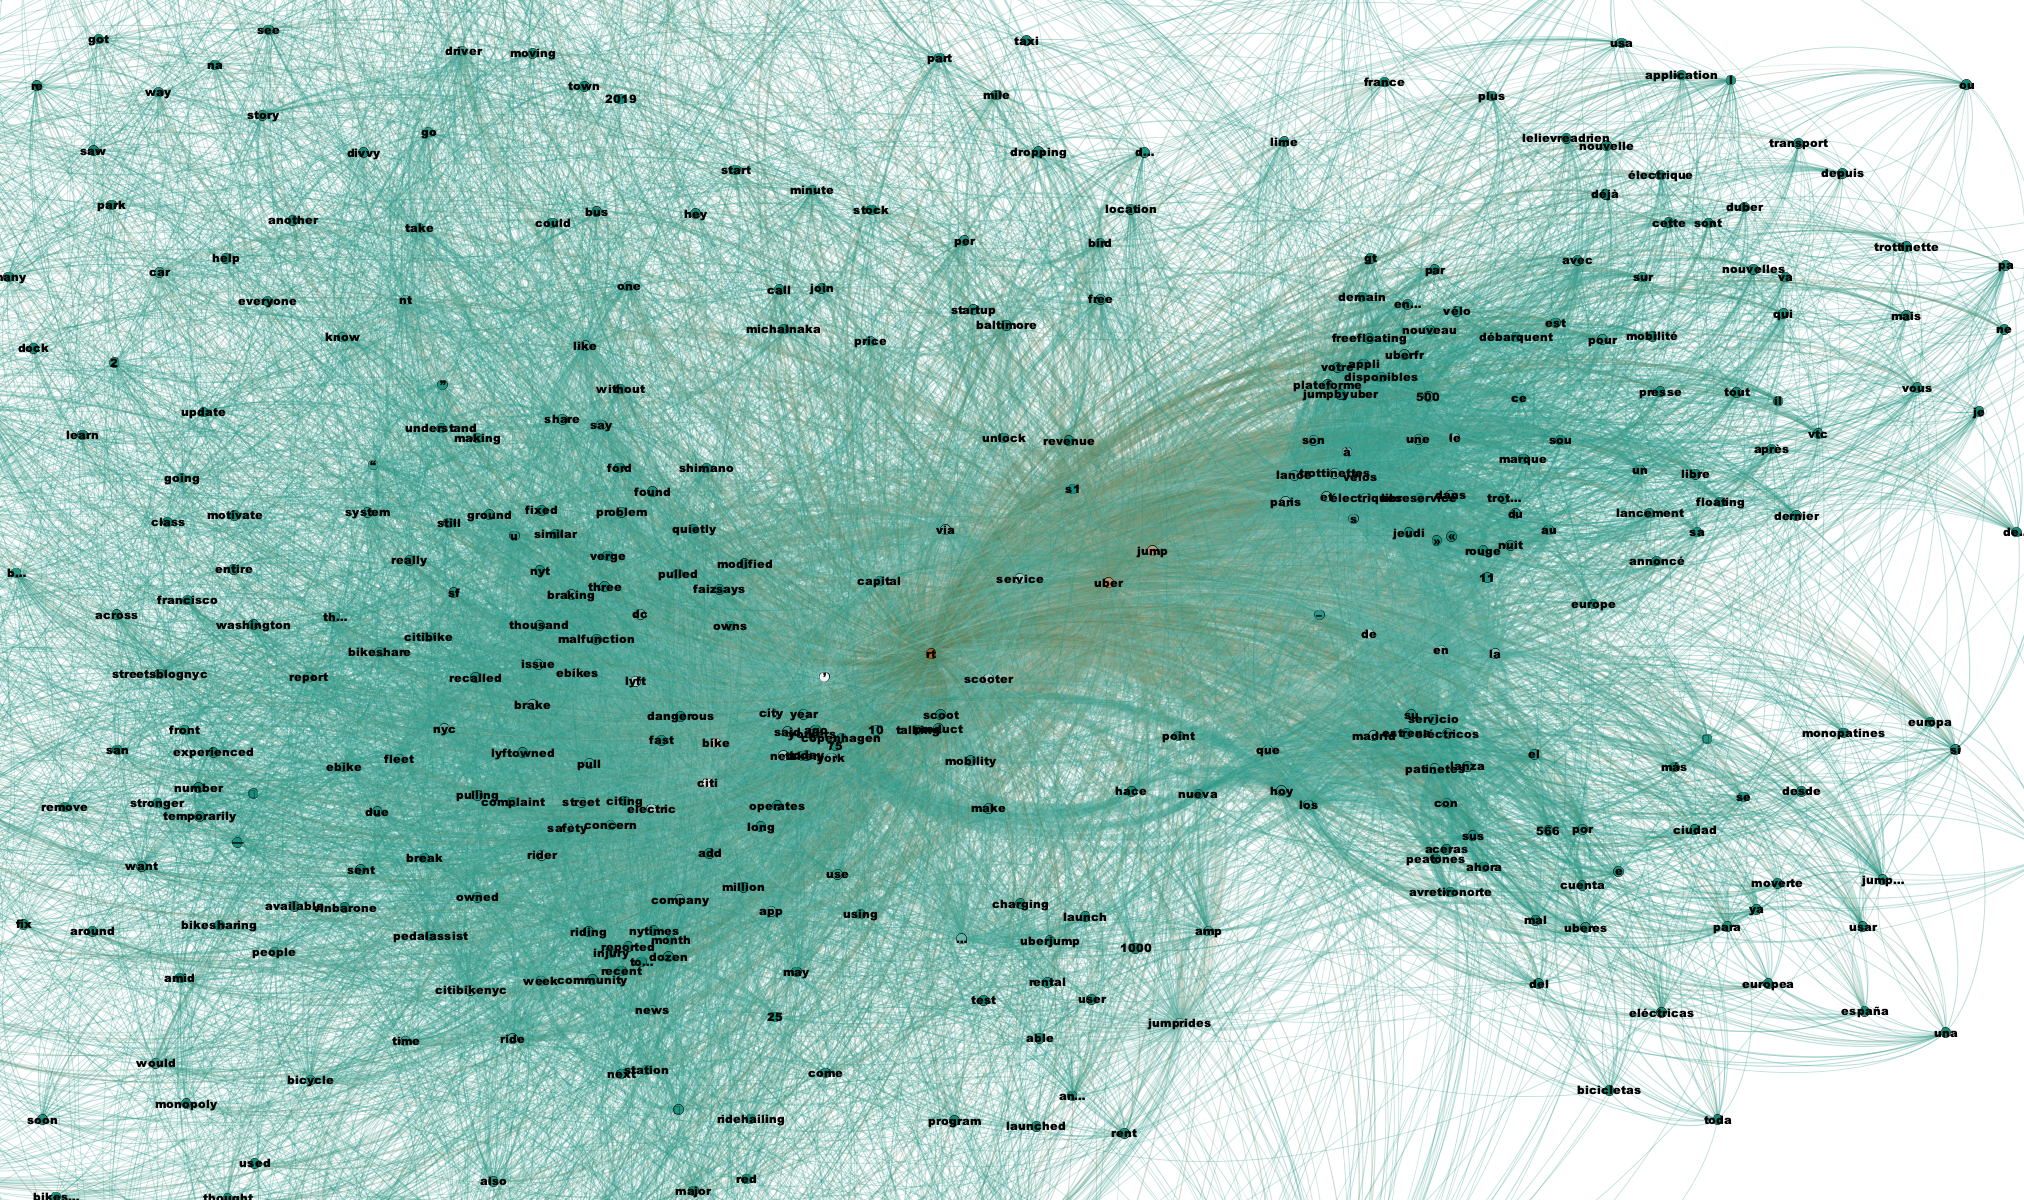